In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from pydataset import data

In [2]:
# Load the mpg dataset. Read the documentation for it, and use the data to answer these questions:
# getting a feel of the data
mpg = data("mpg")
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [3]:
# averaging the city and hwy mpg and making a new colum avg_mpg
mpg['avg_mpg'] = (mpg.cty + mpg.hwy)/2
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [4]:
# On average, which manufacturer has the best miles per gallon?
#using mpg df grouping by manufacturer, selecting the average avg_mpg then sorting by highest to lowest
mpg.groupby('manufacturer').avg_mpg.mean().sort_values(ascending=False)

manufacturer
honda         28.500000
volkswagen    25.074074
hyundai       22.750000
subaru        22.428571
audi          22.027778
toyota        21.720588
pontiac       21.700000
nissan        21.346154
chevrolet     18.447368
ford          16.680000
mercury       15.625000
jeep          15.562500
dodge         15.540541
lincoln       14.166667
land rover    14.000000
Name: avg_mpg, dtype: float64

In [5]:
## I can grab just the index label for the manufacturer if I want.
mpg.groupby('manufacturer').avg_mpg.mean().idxmax()

'honda'

In [6]:
# I can also perform that aggregation on a list of columns and sort by one.
mpg.groupby('manufacturer')[['cty','hwy','avg_mpg']].mean().sort_values(by='avg_mpg', ascending=False)

,cty,hwy,avg_mpg
manufacturer,,,
honda,24.444444,32.555556,28.500000
volkswagen,20.925926,29.222222,25.074074
hyundai,18.642857,26.857143,22.750000
subaru,19.285714,25.571429,22.428571
audi,17.611111,26.444444,22.027778
toyota,18.529412,24.911765,21.720588
pontiac,17.000000,26.400000,21.700000
nissan,18.076923,24.615385,21.346154
chevrolet,15.000000,21.894737,18.447368


In [7]:
#b. How many different manufacturers are there?
mpg.manufacturer.nunique()

15

In [8]:
# The `.describe()` method will tell me that and more, if I want more.
mpg.manufacturer.describe()

count       234
unique       15
top       dodge
freq         37
Name: manufacturer, dtype: object

In [9]:
#c. How many different models are there?
mpg.model.nunique()

38

In [10]:
#d. Do automatic or manual cars have better miles per gallon?
# I check the values in the `trans` column. What am I working with?
mpg.trans.value_counts()

auto(l4)      83
manual(m5)    58
auto(l5)      39
manual(m6)    19
auto(s6)      16
auto(l6)       6
auto(av)       5
auto(s5)       3
auto(s4)       3
auto(l3)       2
Name: trans, dtype: int64

In [11]:
#making a transmission column in the mpg DF. np.where to look in mpg.trans where the string startswith ('a')
# , for 'auto', else 'manual'
mpg['transmission'] = np.where(mpg.trans.str.startswith('a'), 'auto', 'manual')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mpg,transmission
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,auto
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,manual
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,manual
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,auto
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,auto


In [12]:
mpg['trans_category'] = np.where(mpg.trans.str.startswith('a'), 'auto', 'manual')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mpg,transmission,trans_category
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,auto,auto
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,manual,manual
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,manual,manual
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,auto,auto
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,auto,auto


In [13]:
# use df mpg and group by the new category [['cty','hwy']] and getting the average
mpg.groupby('transmission')[['cty','hwy']].mean()

,cty,hwy
transmission,,
auto,15.968153,22.292994
manual,18.675325,25.779221


In [14]:
users = pd.DataFrame({
    'id': [1, 2, 3, 4, 5, 6],
    'name': ['bob', 'joe', 'sally', 'adam', 'jane', 'mike'],
    'role_id': [1, 2, 3, 3, np.nan, np.nan]
})

users

,id,name,role_id
0,1,bob,1.0
1,2,joe,2.0
2,3,sally,3.0
3,4,adam,3.0
4,5,jane,NaN
5,6,mike,NaN


In [15]:
roles = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'name': ['admin', 'author', 'reviewer', 'commenter']
})

roles

,id,name
0,1,admin
1,2,author
2,3,reviewer
3,4,commenter


In [16]:
#a. What do you think a right join would look like?
right_join = pd.merge(users,roles, left_on='role_id' ,right_on='id' , how='right')
right_join

,id_x,name_x,role_id,id_y,name_y
0,1.0,bob,1.0,1,admin
1,2.0,joe,2.0,2,author
2,3.0,sally,3.0,3,reviewer
3,4.0,adam,3.0,3,reviewer
4,NaN,NaN,NaN,4,commenter


In [17]:
# how to drop and rename columns using method chaining
clean_right = pd.merge(users,
                       roles,
                       left_on='role_id',
                       right_on='id',
                       how='right').drop(columns = 'role_id').rename(columns={'id_x': 'id',
                                                                            'name_x': 'name',
                                                                            'id_y': 'role_id',
                                                                            'name_y': 'role'})
clean_right

,id,name,role_id,role
0,1.0,bob,1,admin
1,2.0,joe,2,author
2,3.0,sally,3,reviewer
3,4.0,adam,3,reviewer
4,NaN,NaN,4,commenter


In [18]:
#b. What would an outer join look like?
outer_join = pd.merge(users,roles, left_on = "role_id", right_on = "id", how="outer")
outer_join

,id_x,name_x,role_id,id_y,name_y
0,1.0,bob,1.0,1.0,admin
1,2.0,joe,2.0,2.0,author
2,3.0,sally,3.0,3.0,reviewer
3,4.0,adam,3.0,3.0,reviewer
4,5.0,jane,NaN,NaN,NaN
5,6.0,mike,NaN,NaN,NaN
6,NaN,NaN,NaN,4.0,commenter


In [19]:
#c. What happens if you drop the foreign keys from the dataframes and try to merge them?
# If I drop the foreign key of `role_id`, I have a very confusing situation!
# If I join on `id`, I'm making a big mistake now.

users_drop = users.drop(columns='role_id')
users_drop

,id,name
0,1,bob
1,2,joe
2,3,sally
3,4,adam
4,5,jane
5,6,mike


In [20]:
#Getting data from SQL databases
#a. Create a function named get_db_url. It should accept a username, hostname, password, and database name
# and return a url formatted like in the examples in this lesson.


In [21]:
from env import host, password, user

In [22]:
def get_db_url(db, user=user, host=host, password=password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

In [23]:
#b. Use your function to obtain a connection to the employees database.
#df = pd.read_sql(sql_query, db_url)
sql_query = 'SELECT * FROM employees'
employees = pd.read_sql(sql_query, get_db_url('employees'))
employees.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [24]:
#converting the sql querry df to a csv to make my calculations faster
employees.to_csv('employees.csv')
# employees.to_csv('employees.csv')

In [25]:
#Now working with the csv file instead of interacting with the server
employees = pd.read_csv('employees.csv',index_col=0)
employees.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [100]:
#d. Read the employees and titles tables into two separate dataframes.
sql_query = 'SELECT * FROM titles'
titles = pd.read_sql(sql_query, get_db_url('employees'))
titles.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


In [ ]:
#converting titles df to csv  titles.to_csv('titles.csv')
#titles.to_csv('titles.csv')

In [28]:
titles = pd.read_csv('titles.csv', index_col=0)
titles.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


In [29]:
titles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 443308 entries, 0 to 443307
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   emp_no     443308 non-null  int64 
 1   title      443308 non-null  object
 2   from_date  443308 non-null  object
 3   to_date    443308 non-null  object
dtypes: int64(1), object(3)
memory usage: 16.9+ MB


In [30]:
employees.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300024 entries, 0 to 300023
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   emp_no      300024 non-null  int64 
 1   birth_date  300024 non-null  object
 2   first_name  300024 non-null  object
 3   last_name   300024 non-null  object
 4   gender      300024 non-null  object
 5   hire_date   300024 non-null  object
dtypes: int64(1), object(5)
memory usage: 16.0+ MB


In [31]:
#e. Visualize the number of employees with each title.
titles.shape

(443308, 4)

In [32]:
#This will give me bool series of current employees as i set the to_date == to_date.max() (9999-01-01)
current_bool = titles.to_date == titles.to_date.max()
current_bool.head()

0     True
1     True
2     True
3    False
4     True
Name: to_date, dtype: bool

In [33]:
#this will give me a DF of the titles of the current employees
current_employees_titles = titles[current_bool]
current_employees_titles.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
4,10004,Senior Engineer,1995-12-01,9999-01-01
5,10005,Senior Staff,1996-09-12,9999-01-01


In [34]:
#The shape of the current employees titles will show all current employees
current_employees_titles.shape

(240124, 4)

In [35]:
# Using the current_employees_titles DF. Which has 4 colums of data one of which is the title column.
#then getting the value_counts of the title
current_title_values = current_employees_titles.title.value_counts()
current_title_values

Senior Engineer       85939
Senior Staff          82024
Engineer              30983
Staff                 25526
Technique Leader      12055
Assistant Engineer     3588
Manager                   9
Name: title, dtype: int64

In [36]:
current_title_values = current_employee_titles.title.value_counts()
current_title_values

NameError: name 'current_employee_titles' is not defined

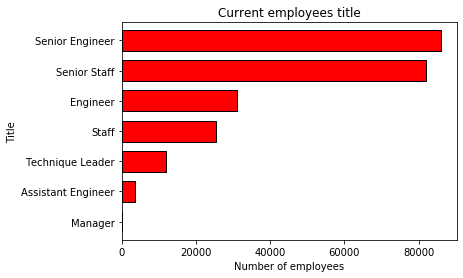

In [38]:
# This is the number of current employees who have a title
current_title_values.plot.barh(color='red', ec='black', width=.7)
plt.title("Current employees title")
plt.xlabel("Number of employees")
plt.ylabel("Title")
#invert the y axis to make the highest number of titles on the top of graph
plt.gca().invert_yaxis()

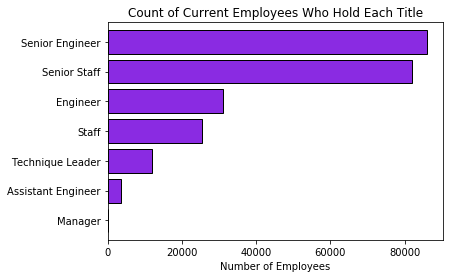

In [39]:
# This is the number of current employees who have a title

current_title_values.plot.barh(color='blueviolet', 
                               ec='black', 
                               width=.8)

plt.title('Count of Current Employees Who Hold Each Title')
plt.xlabel('Number of Employees')

# reorder y-axis of horizontal bar chart
plt.gca().invert_yaxis()

plt.show()

In [40]:
#f. Join the employees and titles dataframes together. I will need to find a column to merge on in the 
# employees DF and the titles DF. They both share emp_no. First DF employees .merge function on the titles
# DF, on the emp_no column
employees_w_titles = employees.merge(titles, on='emp_no')
employees_w_titles.head()


,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,Staff,1996-08-03,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer,1995-12-03,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Engineer,1986-12-01,1995-12-01
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer,1995-12-01,9999-01-01


In [41]:
employees.shape

(300024, 6)

In [42]:
titles.shape

(443308, 4)

In [43]:
#g. Visualize how frequently employees change titles. So doing a value count on the employees with titles
# on the emp_no column with a random sample shows that we have employees that change titles frequently
employees_w_titles.emp_no.value_counts().sample(5)

253440    1
249082    2
295275    2
58594     2
427607    1
Name: emp_no, dtype: int64

In [44]:
# creating changes variable that shows the frequency of employees change titles and doing a value count on 
# that to see the frequency of employees change 1,2 and 3 times
changes = employees_w_titles.emp_no.value_counts()
changes.value_counts()

1    159754
2    137256
3      3014
Name: emp_no, dtype: int64

([<matplotlib.axis.XTick at 0x7fa626fdac50>,
 <a list of 3 Text xticklabel objects>)

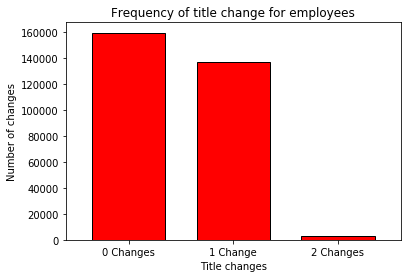

In [45]:
changes.value_counts().plot.bar(color='red', width = .7, ec="black")
#rotating the x ticks
plt.xticks(rotation=0)
plt.title("Frequency of title change for employees")
plt.xlabel("Title changes")
plt.ylabel("Number of changes")
plt.xticks(ticks=[0,1,2], labels=['0 Changes','1 Change','2 Changes'])

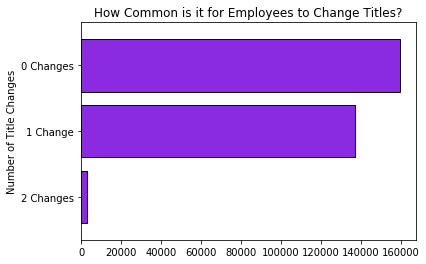

In [46]:
# Plot the frequency of title changes, 0 changes=1 title, 1 change=2 titles, 2 changes=3 titles

changes.value_counts().plot(kind='barh', 
                            color='blueviolet', 
                            ec='black', 
                            width=.8)

plt.title('How Common is it for Employees to Change Titles?')
plt.ylabel('Number of Title Changes')
plt.yticks(ticks=[0,1,2], labels=['0 Changes', '1 Change', '2 Changes'])

# reorder y-axis of horizontal bar chart
plt.gca().invert_yaxis()

plt.show()


In [52]:
#For each title, find the hire date of the employee that was hired most recently with that title.
# using the employees_w_titles df. group by title and find the hire_date.max() to show most recent hire title
employees_w_titles.groupby('title').hire_date.max()
employees_w_titles.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,Staff,1996-08-03,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer,1995-12-03,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Engineer,1986-12-01,1995-12-01
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer,1995-12-01,9999-01-01


In [54]:
#Write the code necessary to create a cross tabulation of the number of titles by department.
#Joining the titles with dept_emp to get titles and dept_name
dept_title_query = '''
                    SELECT t.emp_no,
                    t.title,
                    t.from_date,
                    t.to_date,
                    d.dept_name
                    FROM departments AS d
                    JOIN dept_emp AS de USING(dept_no)
                    JOIN titles AS t USING(emp_no);
                    '''

In [56]:
# Code that originally read in my data from the database
dept_titles = pd.read_sql(dept_title_query, get_db_url('employees'))
dept_titles.head()
# dept_titles = pd.read_sql(dept_title_query, get_db_url('employees'))

,emp_no,title,from_date,to_date,dept_name
0,10011,Staff,1990-01-22,1996-11-09,Customer Service
1,10038,Senior Staff,1996-09-20,9999-01-01,Customer Service
2,10038,Staff,1989-09-20,1996-09-20,Customer Service
3,10049,Senior Staff,2000-05-04,9999-01-01,Customer Service
4,10049,Staff,1992-05-04,2000-05-04,Customer Service


In [57]:
# Code that wrote my data to a csv file for faster access.
#dept_titles.to_csv('dept_titles.csv')

In [61]:
#Access the data with CSV for faster results
dept_titles = pd.read_csv('dept_titles.csv', index_col=0)
dept_titles.head()

,emp_no,title,from_date,to_date,dept_name
0,10011,Staff,1990-01-22,1996-11-09,Customer Service
1,10038,Senior Staff,1996-09-20,9999-01-01,Customer Service
2,10038,Staff,1989-09-20,1996-09-20,Customer Service
3,10049,Senior Staff,2000-05-04,9999-01-01,Customer Service
4,10049,Staff,1992-05-04,2000-05-04,Customer Service


In [59]:
# Create a frequency table of titles by department
# using pandas crosstab function. Using the dept_titles df and selecting the first column of data dept name. 
# again dept_titles df. title column. Shows all employees titles
titles_crosstab = pd.crosstab(dept_titles.dept_name,dept_titles.title)
titles_crosstab

title,Assistant Engineer,Engineer,Manager,Senior Engineer,Senior Staff,Staff,Technique Leader
dept_name,,,,,,,
Customer Service,298,2362,4,2027,13925,16150,309
Development,7769,58135,2,49326,1247,1424,7683
Finance,0,0,2,0,12139,13929,0
Human Resources,0,0,2,0,12274,14342,0
Marketing,0,0,2,0,13940,16196,0
Production,6445,49649,4,42205,1270,1478,6557
Quality Management,1831,13852,4,11864,0,0,1795
Research,378,2986,2,2570,11637,13495,393
Sales,0,0,2,0,36191,41808,0


In [64]:
# Create a subset of only titles currently held by employees
# use dept_titles DF use bracket notation to get dept_titles.todate == dept_titles.to_date.max to show current
# titles
current_titles = dept_titles[dept_titles.to_date == dept_titles.to_date.max()]
current_titles.head()

,emp_no,title,from_date,to_date,dept_name
1,10038,Senior Staff,1996-09-20,9999-01-01,Customer Service
3,10049,Senior Staff,2000-05-04,9999-01-01,Customer Service
5,10060,Senior Staff,1996-05-28,9999-01-01,Customer Service
7,10088,Senior Staff,1993-09-02,9999-01-01,Customer Service
11,10112,Staff,1998-05-01,9999-01-01,Customer Service


In [65]:
current_titles.shape

(265332, 5)

In [66]:
# Create a frequency table of titles by department
cur_titles_crosstab = pd.crosstab(current_titles.dept_name, current_titles.title)
cur_titles_crosstab

title,Assistant Engineer,Engineer,Manager,Senior Engineer,Senior Staff,Staff,Technique Leader
dept_name,,,,,,,
Customer Service,68,627,1,1790,12349,3902,241
Development,1833,15677,1,43364,1085,315,6117
Finance,0,0,1,0,10650,3199,0
Human Resources,0,0,1,0,10843,3416,0
Marketing,0,0,1,0,12371,3880,0
Production,1542,13325,1,37156,1123,349,5210
Quality Management,433,3744,1,10390,0,0,1422
Research,77,830,1,2250,10219,3206,321
Sales,0,0,1,0,32032,9967,0


In [67]:
# Use your get_db_url function to help you explore the data from the chipotle database. Use the data
# to answer the following questions:
chipotle_sql_query = '''SELECT * FROM orders;'''


In [68]:
#creating a orders df. reading the chipotle_sql_query with get_db_url of "chipotle"
orders = pd.read_sql(chipotle_sql_query, get_db_url("chipotle"))
orders.head()

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98


In [69]:
#Converting to csv
orders.to_csv('orders.csv')
#dept_titles.to_csv('dept_titles.csv')

In [70]:
#reading the new csv df
orders = pd.read_csv('orders.csv', index_col=0)
orders.head()

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98


In [93]:
#4a. What is the total price for each order? created a price column to show price w/o $ sign
orders["item_price"] = orders.item_price.str.replace("$", "").astype(float)
orders.head()

,id,order_id,quantity,item_name,choice_description,item_price,price
0,1,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,2.39
1,2,1,1,Izze,[Clementine],3.39,3.39
2,3,1,1,Nantucket Nectar,[Apple],3.39,3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",16.98,16.98


In [96]:
orders.drop(["price"], axis=1).head()

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,2,1,1,Izze,[Clementine],3.39
2,3,1,1,Nantucket Nectar,[Apple],3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",16.98


In [94]:
order_totals = orders.groupby("order_id").item_price.sum()
order_totals.head()

order_id
1    11.56
2    16.98
3    12.67
4    21.00
5    13.70
Name: item_price, dtype: float64

In [83]:
#b. What are the most popular 3 items?
top_three = orders.groupby("item_name").quantity.sum().sort_values(ascending=False).head(3)
top_three


item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Name: quantity, dtype: int64

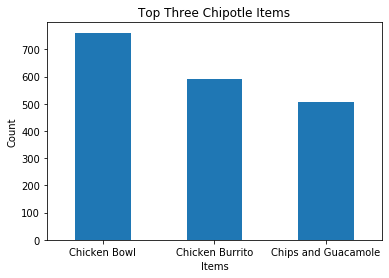

In [92]:
top_three.plot.bar()
plt.title("Top Three Chipotle Items")
plt.xlabel("Items")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()


In [97]:
#c. Which item has produced the most revenue?
orders['revenue'] = orders.quantity * orders.item_price
orders.head()


,id,order_id,quantity,item_name,choice_description,item_price,price,revenue
0,1,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,2.39,2.39
1,2,1,1,Izze,[Clementine],3.39,3.39,3.39
2,3,1,1,Nantucket Nectar,[Apple],3.39,3.39,3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,2.39,2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",16.98,16.98,33.96


In [99]:
# This way I can also see the revenue produced by item as well as item.
orders.groupby("item_name").revenue.sum().sort_values(ascending=False).head(1)


item_name
Chicken Bowl    8044.63
Name: revenue, dtype: float64